In [50]:
import sys
import numpy as np
sys.path.append('./code/')
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
from rover_model.perception import PerspectiveInference
from rover_model.perception import perspective_matrix
from rover_model.perception import perspective_bias
from rover_model.perception import ImagePerspectiveInference
from rover_model.perception import ProjectionCoordinateInference
from rover_resource import VIEW_POINT_POSITION
from rover_resource import PIXEL_SCALING
from rover_resource import CAMERA_POSITION
from rover_resource import FRAME_SHAPE
from rover_resource import DEFAULT_THRESHOLD
from rover_agent.frame_geometry import color_thresh
from rover_agent.frame_geometry import 

In [2]:
image = mpimg.imread('./calibration_images/example_grid1.jpg')
frame_shape = (FRAME_SHAPE[1], FRAME_SHAPE[0])
img_perspect = ImagePerspectiveInference(
    CAMERA_POSITION, VIEW_POINT_POSITION, 
    frame_shape, PIXEL_SCALING, 10, frame_shape)
proj = ProjectionCoordinateInference(160, 2000)
perspect = PerspectiveInference(CAMERA_POSITION, VIEW_POINT_POSITION)

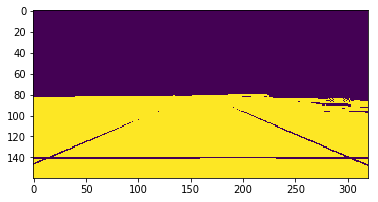

In [56]:
th_image = color_thresh(image, DEFAULT_THRESHOLD)
plt.imshow(th_image)
plt.show()

In [88]:
particles = th_image.nonzero()
particles = np.array([particles[1], particles[0]], dtype=np.float64)
t_coords = proj(particles)
s_coords = perspect.particle_transform(0, 0, t_coords)

In [116]:
# scale and shift to render
render_scale = 200
scaled_s_coords = s_coords * render_scale
# render to a 600 x 600
print(scaled_s_coords[:, 1].max(), scaled_s_coords[:, 1].min())
print(scaled_s_coords[:, 0].min(), scaled_s_coords[:, 0].max())
scaled_s_coords[:, 1] += 300
scaled_s_coords = np.around(scaled_s_coords).astype('uint32')
scaled_s_coords = scaled_s_coords.clip(0, 599)
render = np.zeros([600, 600], dtype=np.uint8)
render[600 - scaled_s_coords[:,0], scaled_s_coords[:, 1]] += 1

2013.53905674 -4851.27307742
102.741904748 8476.69014624


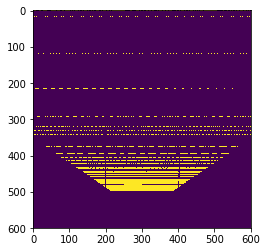

In [117]:
plt.imshow(render)
plt.show()

In [5]:
particles = np.meshgrid(range(320), range(160))

In [6]:
particles = [x.reshape(-1) for x in particles]

In [7]:
particles = np.array(particles)

In [8]:
particles.shape

(2, 51200)

In [108]:
scaled_s_coords[:,0].mean()

13.494304568954647

In [10]:
coords = proj(particles)

In [15]:
new_coords = perspect.particle_transform(roll=0, pitch=0, particles=coords)

In [19]:
new_coords[0]

array([-0.06461309, -0.43743215])

In [48]:
pixel = np.array([[222], [80]])
ret = proj(pixel)
print(ret)
pixel = np.array([[120.78], [1]])
ret = proj(pixel)

[[ 0.04 ]
 [ 0.111]]


In [38]:
print(perspect.particle_transform(0, 0, ret))

[[-0.0683009  -0.11593956]]


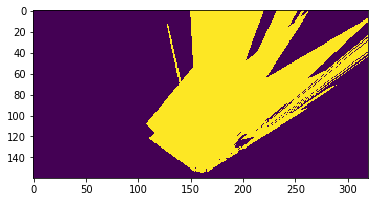

In [122]:
def perspect_transform(img, src, dst):

    # Get transform matrix using cv2.getPerspectivTransform()
    M = cv2.getPerspectiveTransform(src, dst)
    # Warp image using cv2.warpPerspective()
    # keep same size as input image
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    # Return the result
    return warped

source = np.float32([[14.32 , 140.71], [ 120.78, 95.5], [199.49 ,96.84], [302.7 ,140.71]])

dst_size = 5
bottom_offset = 6
destination = np.float32([[image.shape[1]/2 - dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 - dst_size, image.shape[0] - bottom_offset - 2*dst_size],
                  [image.shape[1]/2 + dst_size, image.shape[0] - bottom_offset - 2*dst_size], 
                  [image.shape[1]/2 + dst_size, image.shape[0] - bottom_offset]])

warped = perspect_transform(th_image, source, destination)
plt.imshow(warped)
plt.show()

In [125]:
cv2.getPerspectiveTransform(source, destination)

array([[  2.13895972e-02,  -2.10893154e+00,   1.64161320e+02],
       [  4.75842975e-02,  -2.08277627e+00,   1.60959310e+02],
       [  3.08988953e-04,  -1.32033615e-02,   1.00000000e+00]])

In [126]:
s_coords.shape

(23791, 2)